In [1]:
import geopandas as gp
import shapely as sh
import numpy as np
import matplotlib.pyplot as plt
import sys
import xarray as xr
import glob
from skimage import exposure

In [2]:
path_to_train_points = "../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/WindBlowProject_TrainingPoints_StormArwen_30UWG.gpkg"
path_to_train_poly = "../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/WindBlowProject_TrainingPolygons_StormArwen_30UWG.gpkg"
path_to_csv = "../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/WindBlowProject_TrainingPointsPlusS2_BFR_AFTR_StormArwen_30UWG.csv"


train_points_df = gp.read_file(path_to_train_points)
train_poly_df = gp.read_file(path_to_train_poly)
points_csv = gp.read_file(path_to_csv)

<AxesSubplot:>

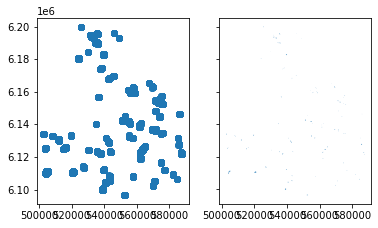

In [3]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=True)
train_points_df.plot(ax=ax1)
train_poly_df.plot(ax=ax2)

In [4]:
train_points_df.head()

PolygonID ArwenDamage  PointID                        geometry
0          1         Yes        1  POINT (569085.000 6163255.000)
1          1         Yes        2  POINT (569095.000 6163255.000)
2          1         Yes        3  POINT (569105.000 6163255.000)
3          1         Yes        4  POINT (569115.000 6163255.000)
4          1         Yes        5  POINT (569125.000 6163255.000)

In [5]:
train_points_df.index

RangeIndex(start=0, stop=93279, step=1)

In [6]:
train_poly_df.head()

ArwenDamage  ID                                           geometry
0         Yes   1  POLYGON ((569193.286 6163254.021, 569363.984 6...
1         Yes   2  POLYGON ((567409.175 6165386.063, 567446.445 6...
2         Yes   3  POLYGON ((572558.712 6153904.687, 572662.241 6...
3         Yes   4  POLYGON ((572353.724 6153496.782, 572237.772 6...
4         Yes   5  POLYGON ((574578.565 6153024.689, 574470.894 6...

In [7]:
train_poly_df.index

RangeIndex(start=0, stop=100, step=1)

In [8]:
points_csv.head() # remove geometry column

PolygonID PointID ArwenDamage BFR_B01 BFR_B02 BFR_B03 BFR_B04 BFR_B05  \
0         1       1         Yes     204     197     243     142     364   
1         1       2         Yes     204     184     137     130     364   
2         1       3         Yes     222     223     237     157     283   
3         1       4         Yes     222     206     188     149     283   
4         1       5         Yes     222     198     260     181     356   

  BFR_B06 BFR_B07  ... AFTR_B04 AFTR_B05 AFTR_B06 AFTR_B07 AFTR_B08 AFTR_B8A  \
0     935    1127  ...      452      690     1123     1299      986     1385   
1     935    1127  ...      457      690     1123     1299     1238     1385   
2     904    1066  ...      460      790     1438     1721     1422     1954   
3     904    1066  ...      540      790     1438     1721     1426     1954   
4     994    1241  ...      546      907     1455     1703     1488     2035   

  AFTR_B09 AFTR_B11 AFTR_B12 geometry  
0     1663      662      351     None  
1     1663      662      351     None  
2     1484      849      473     None  
3     1484      849      473     None  
4     1484      824      394     None  

[5 rows x 28 columns]

In [9]:
points_csv.index

RangeIndex(start=0, stop=93279, step=1)

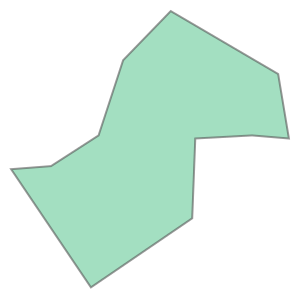

In [10]:
train_poly_df.iloc[30]['geometry']

In [11]:
tiles_list = glob.glob("../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/S2B_MSIL2A_20211218T113359_N0301_R080_T30UWG_20211218T131222.SAFE/GRANULE/L2A_T30UWG_A024988_20211218T113442/IMG_DATA/R10m/*")
tiles_list

['../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/S2B_MSIL2A_20211218T113359_N0301_R080_T30UWG_20211218T131222.SAFE/GRANULE/L2A_T30UWG_A024988_20211218T113442/IMG_DATA/R10m/T30UWG_20211218T113359_B02_10m.jp2',
 '../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/S2B_MSIL2A_20211218T113359_N0301_R080_T30UWG_20211218T131222.SAFE/GRANULE/L2A_T30UWG_A024988_20211218T113442/IMG_DATA/R10m/T30UWG_20211218T113359_WVP_10m.jp2',
 '../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/S2B_MSIL2A_20211218T113359_N0301_R080_T30UWG_20211218T131222.SAFE/GRANULE/L2A_T30UWG_A024988_20211218T113442/IMG_DATA/R10m/T30UWG_20211218T113359_B04_10m.jp2',
 '../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/S2B_MSIL2A_20211218T113359_N0301_R080_T30UWG_20211218T131222.SAFE/GRANULE/L2A_T30UWG_A024988_20211218T113442/IMG_DATA/R10m/T30UWG_20211218T113359_B08_10m.jp2',
 '../GSI-folder2/KCL_Hackathon_GSI_Challenge_Data/S2B_MSIL2A_20211218T113359_N0301_R080_T30UWG_20211218T131222.SAFE/GRANULE/L2A_T30UWG_A024988_20211218T113442/I

In [12]:
band_2 = xr.open_rasterio(tiles_list[0])
band_3 = xr.open_rasterio(tiles_list[4])
band_4 = xr.open_rasterio(tiles_list[2])

In [13]:
band_2

<xarray.DataArray (band: 1, y: 10980, x: 10980)>
[120560400 values with dtype=uint16]
Coordinates:
  * band     (band) int64 1
  * y        (y) float64 6.2e+06 6.2e+06 6.2e+06 ... 6.09e+06 6.09e+06 6.09e+06
  * x        (x) float64 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05 6.098e+05
Attributes:
    transform:   (10.0, 0.0, 499980.0, 0.0, -10.0, 6200040.0)
    crs:         +init=epsg:32630
    res:         (10.0, 10.0)
    is_tiled:    1
    nodatavals:  (nan,)
    scales:      (1.0,)
    offsets:     (0.0,)

In [14]:
band_2.values

array([[[ 798,  657,  615, ..., 3826, 3426, 3520],
        [ 827,  763,  683, ..., 4148, 3670, 3688],
        [ 845,  853,  774, ..., 4644, 4276, 4090],
        ...,
        [ 552,  641,  692, ...,    0,    0,    0],
        [ 620,  693,  627, ...,    0,    0,    0],
        [ 563,  582,  616, ...,    0,    0,    0]]], dtype=uint16)

In [15]:
band_2.shape

(1, 10980, 10980)

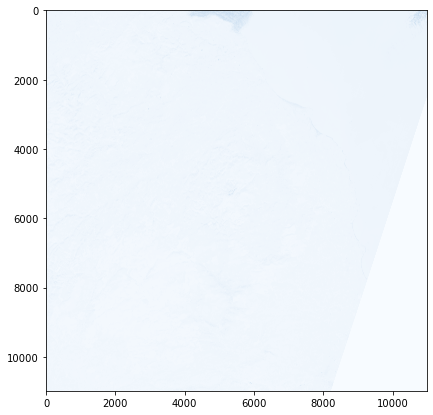

In [16]:
plt.figure(figsize=(7, 7))
plt.imshow(band_2[0].values, cmap='Blues')

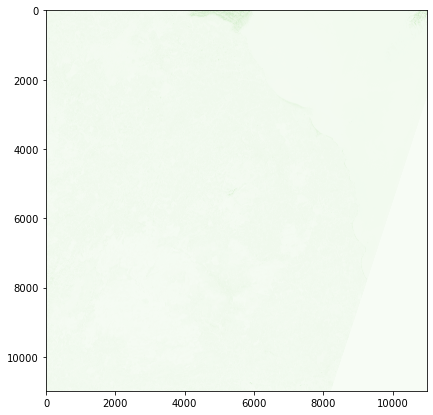

In [17]:
plt.figure(figsize=(7, 7))
plt.imshow(band_3[0].values, cmap='Greens')

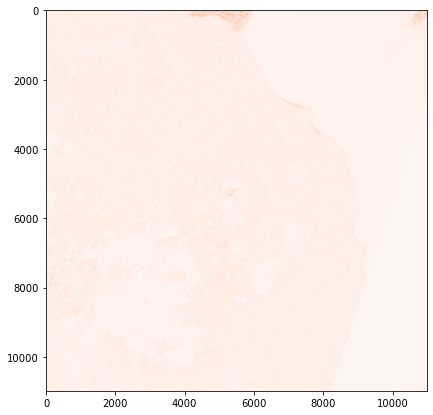

In [18]:
plt.figure(figsize=(7, 7))
plt.imshow(band_4[0].values, cmap='Reds')

In [19]:
R, G, B = band_4[0].values, band_3[0].values, band_2[0].values
RGB = np.dstack([R, G, B]).astype('float16')
p2, p98 = np.percentile(RGB, (2, 98))

In [24]:
image = (exposure.rescale_intensity(RGB, in_range=(p2, p98))).astype('float32') #'image'

In [26]:
image.shape

(10980, 10980, 3)

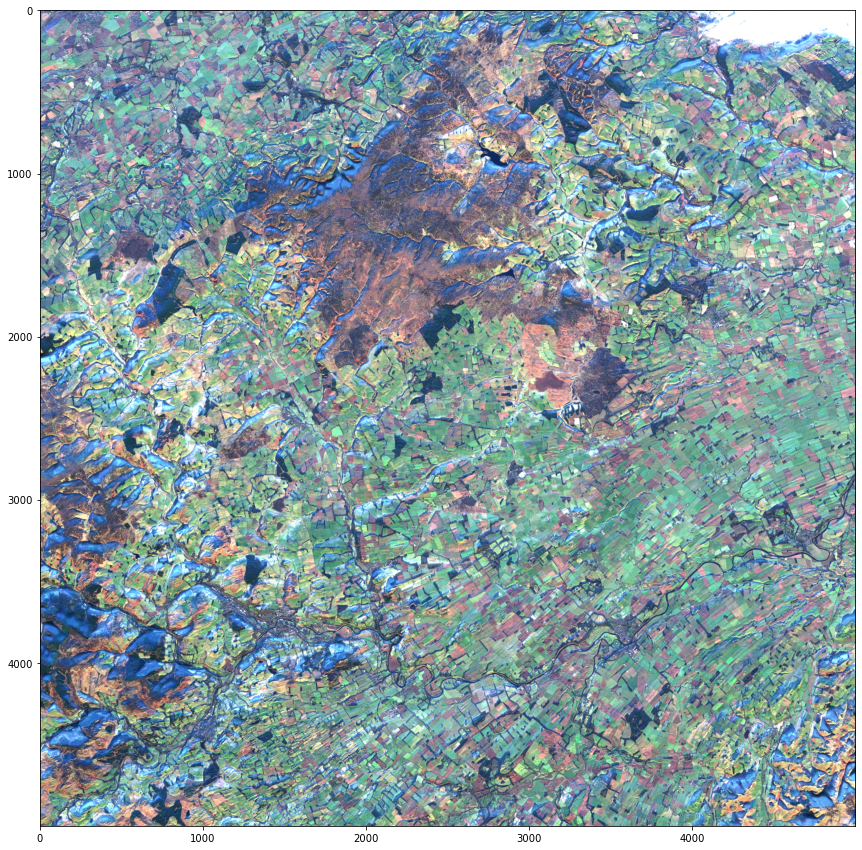

In [29]:
plt.figure(figsize=(15, 15))
plt.imshow(image[:5000, :5000, :])

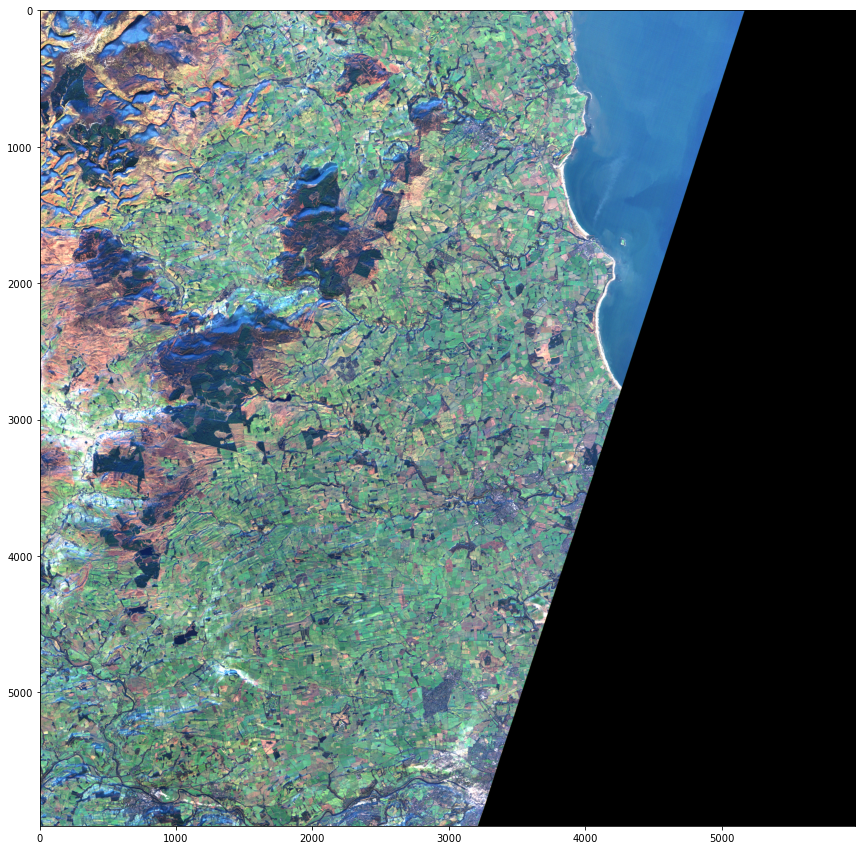

In [28]:
plt.figure(figsize=(15, 15))
plt.imshow(image[5000:, 5000:, :])